# Implementing a Machine Learning Model for House Price Prediction

## Problem Statment<a name="introduction"></a>
Determining and estimating housing prices in urban areas is paramount for planners and decision-makers. Accurate estimation, reflecting the influence of various factors on value, is indispensable for urban and regional policy planning and decision-making. The hedonic model has been widely used for decades to estimate housing prices due to the heterogeneity of housing and its price sensitivity stemming from its characteristics.

Housing is considered a commodity with dual properties in economic studies. Apart from its consumption value, it attracts economic investors as an asset. Therefore, precise prediction of housing prices and understanding the factors influencing them is crucial for homeowners, investors, and auditors of financial and non-movable asset markets. Having a model to predict prices fills existing information gaps and enhances asset market efficiency. The hedonic pricing model, accounting for all housing characteristics, is particularly useful for predicting the price of this heterogeneous commodity or examining the factors influencing its price.

In this study, we investigated the factors affecting housing prices in the USA  using the hedonic pricing model. We considered 12 features of housing, primarily focusing on physical features, to examine their roles in determining housing prices in the region. Initial estimates and calculations indicated that these features explain approximately 63% of the variation in housing prices in the region(according to the $R^2$ score). Consequently, we further analyzed these parameters. Among the 13 algorithms employed, Random Forest Regressor and Gradient Boosting Regressor yielded the most promising results.
## Objectives:
1-To construct a sophisticated machine learning model that utilizes diverse data inputs to forecast housing prices effectively.\
2-To provide individuals involved in the buying or selling of properties with a reliable tool for ensuring fair and well-informed pricing strategies.

## Method<a name="method"></a>
Several studies have looked into using machine learning to guess house prices. Chowhaan (2023) and Shankar (2020) discovered that methods like artificial neural networks (ANN), support vector regression (SVR), and linear regression (LR) work well. Shankar also talked about how house prices can be different in various neighborhoods. Phan (2018) and Fang (2023) agree with using machine learning. Phan especially mentioned that combining Stepwise and Support Vector Machine works. Lahmiri (2023) also talked about different machine learning methods like regression tree, random forest, XGBoost, gradient boosting, and LightGBM and how they can guess housing prices accurately.

In order to check the price of housing in an urban area, we used different algorithms (9 algorithms) and among these algorithms, we chose the model that has the lowest RMSE and the highest R square. In this regard, the following algorithms were used and finally among 9 algorithms, random forest regression and XGBRegressor have the best results.
| Algorithm               |    R2   |   RMSE  |   Time    |
|-------------------------|---------|---------|-----------|
| Random_Forest_Reg       | **0.665**   | 0.550   | **307.322**   |
| XGB_Reg                 | **0.659**   | 0.555   |   **1.015**   |
| Gradient_Boosting_Reg   | 0.583   | 0.615   |  48.246   |
| Decision_Tree_Reg       | 0.304   | 0.793   |   4.684   |
| Ridge_Reg               | 0.262   | 0.817   |   0.130   |
| Linear_Reg              | 0.262   | 0.817   |   0.238   |
| KN_Reg                  | 0.173   | 0.865   |  12.765   |
| Lasso_Reg               | 0.000   | 0.951   |   0.198   |
| AdaBoost_Reg            | -13.443 | 3.615   |  21.606   |

### Data Collection and Data Exploration<a name="data-collection"></a>
The data utilized for analysis was sourced from the Kaggle website [Ahmed Shahriar Sakib. (2021)].Data was collected via web scraping using python libraries and every week this dataset are updated. This dataset encompasses 10 variables, with the exception of the housing price (price), all other variables were employed as features. 

| Variable        | Description                                                  |
|-----------------|--------------------------------------------------------------|
| status          | Housing status - a. ready for sale or b. ready to build     |
| bed             | Number of bedrooms                                           |
| bath            | Number of bathrooms                                          |
| acre_lot        | Property / Land size in acres                                |
| city            | City name                                                    |
| state           | State name                                                   |
| zip_code        | Postal code of the area                                      |
| house_size      | House area/size/living space in square feet                  |
| prev_sold_date  | Previously sold date                                         |
| price           | Housing price, it is either the current listing price or recently sold price if the house is sold recently |

The desired dataset contains over 4 million records, but upon examination, I realized that 85% of them are duplicates. Therefore, I removed all duplicates, and ultimately, the number of records reduced to slightly over 600,000.
To increase the level of significance of the estimates, additional information was merged into the current dataset. This information includes population and population density for each ZIP code. Population density indicates the demand for housing. This data was also extracted from the [OpenDataSoft].Because population density and population may have collinearity, therefore population density was chosen from these two variables to represent both the area of the region and the population. Also, access to the public transportation system is one of the main factors in the price of houses. For this reason, the relevant data that is available to the public from the following path was used to add this information to the current information.
[https://www.openicpsr.org/openicpsr/project/130282/version/V1/view?path=/openicpsr/130282/fcr:versions/V1.4/nanda_transit_zcta_2016-2018_02P.dta&type=file]

|    | Variable          | Explain | Dtype    |
|---:|-------------------|----------------|----------|
|  0 | zcta19            | zip code | float64  |
|  1 | zcta_area         | zip code aria mile square | float32  |
|  2 | count_ntm_stops   |number of transportation stops | int16    |
|  3 | totpop13_17       | total population | float64  |
|  4 | stops_per_capita  | stops per capita | float32  |
|  5 | stops_per_sqmile  | stops per mile square | float32  |

I utilized date-related data and extracted various temporal features such as the day of the week, day of the month, day of the year, week of the month, week of the year, and season. These features were considered due to their potential influence on house prices.
### Dealing with missing values
Considering that this dataset contains land without buildings(bed,bath and house_size is NaN), these records were discarded.Also, due to the larag data(more than 614298 observations), I removed missing values because in this case there is no idea to impute large missing values so that we have 197897 records which is enough for machin learning models 

### Pipline <a name="tuning"></a>

In this project, the pipeline is designed as follows

1.Data collection

2.Checking data properties (object or float or integer, etc.)

3.Convert all numerics to float format

4.Encode categorical features" 
In the encoding discussion, due to the fact that the number of categories in some features is large (for example, the zip code is close to 9000 items), for this reason, the **LabelEncoder** algorithm has been used."

5.Standardization of data that is numeric for increase the speead of calculation

6.Imputing Missing Values by average or mode

7.Implementation of algorithm and calculation of $R^2$ and RMSE

8.Comparing algorithms and choosing the best model or algorithm

9.Tuning hyperparameters and choosing the best paramaetr

all of the mentioned pipeline have defined through the python class and fucntions

### Evaluation of  Algorithms<a name="evaluate"></a>
The table provides a comprehensive overview of performance metrics, including t ($𝑅^2$) and  (RMSE), for various regression models. Noteworthy models include XGBRegressor, which exhibits exceptional performance with an $𝑅^2$ value of 0.659411 and a low RMSE value of 0.55, indicating precise predictions. Other models such as RandomForestRegressor and GradientBoostingRegressor also demonstrate competitive performance, showcasing $𝑅^2$ values of 0.65 and 0.58, respectively. These metrics illustrate the models' abilities to explain variance and minimize prediction errors.



## References<a name="references"></a>

1.Ahmed Shahriar Sakib. (2021). "House Prices - Advanced Regression Techniques." Kaggle. Available at: [https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset/data](https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset/data) [Accessed 24th March 2024].

2.OpenDataSoft. (N/A). US Zip Codes Points- United States of Americ. Retrieved from [https://data.opendatasoft.com/explore/dataset/georef-united-states-of-america-zc-point%40public/table/]

3.Chowhaan, M.J., Nitish, D., Akash, G., Sreevidya, N. and Shaik, S., 2023. Machine learning approach for house price prediction. Asian Journal of Research in Computer Science, 16(2), pp.54-61.

4.Bhor, V.B., Gaikwad, M.S. and Zende, P.S., 2020. Implementation of housing price prediction. International Journal of Innovative Research in Technology, 6(11), pp.118-122.

5.Phan, T.D., 2018, December. Housing price prediction using machine learning algorithms: The case of Melbourne city, Australia. In 2018 International conference on machine learning and data engineering (iCMLDE) (pp. 35-42). IEEE.

6.Lahmiri, S., Bekiros, S. and Avdoulas, C., 2023. A comparative assessment of machine learning methods for predicting housing prices using Bayesian optimization. Decision Analytics Journal, 6, p.100166.

7.US Zip Codes Points- United States of AmericNational Neighborhood Data Archive (NaNDA): Public Transit Stops by ZIP Code Tabulation Area, United States, 2016-2018. Retrieved from [https://www.openicpsr.org/openicpsr/project/130282/version/V1/view?path=/openicpsr/130282/fcr:versions/V1.4/nanda_transit_zcta_2016-2018_02P.dta&type=file]


## full pipeline function defenition

### 1.Data collection and data exploration

#### 1.1. importing origianl data from the website kaggle with the following address:
The data used, as mentioned earlier, is related to the Kaggle website."Please refer to [**Reference-1**](https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset/data) to access the desired data."

The size of the file is 40 MB and it is not possible to share it through GitHub. I by downloading
  I used the data in my computer, which is in the form of zip, and I deleted the duplicates by doing the following code.


In [118]:
import pandas as pd
import time
from sklearn import preprocessing, linear_model, tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as pylot
import seaborn as sb
from sklearn.preprocessing import PowerTransformer

In [157]:
dt = pd.read_csv("D:/AI/INT_AI/realtor-data.zip.csv")
print(f'data shape befor removing duplicates is: {dt.shape}')
dt=dt.drop_duplicates()
print(f'data shape after removing duplicates is: {dt.shape}')

data shape befor removing duplicates is: (4069420, 10)
data shape after removing duplicates is: (614298, 10)


#### 1.2. step of storing dataset in new file and keeping original data

In [120]:
dt.to_csv('D:/AI/INT_AI/USRealst.csv')

#### 1.3. reading dataset by pandas library from csv file and view the data info

In [154]:
df = pd.read_csv("D:/AI/INT_AI/USRealst.csv")
df=df.drop_duplicates()
df=df.drop(df.columns[:1], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614298 entries, 0 to 614297
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          614298 non-null  object 
 1   bed             449063 non-null  float64
 2   bath            441565 non-null  float64
 3   acre_lot        491815 non-null  float64
 4   city            613858 non-null  object 
 5   state           614292 non-null  object 
 6   zip_code        614187 non-null  float64
 7   house_size      405478 non-null  float64
 8   prev_sold_date  323839 non-null  object 
 9   price           613776 non-null  float64
dtypes: float64(6), object(4)
memory usage: 46.9+ MB


#### 1.4. reading the transportation dataset from the following link
As mentioned before, I want to add other data to the main data. This data is related to public transportation stations, which will play a significant role in house prices. The common key of these data together is the zip code. The common key of these data together is the zip code. In the following, I will merge these two data together.Please refer to [**Reference-7**](https://www.openicpsr.org/openicpsr/project/130282/version/V1/view?path=/openicpsr/130282/fcr:versions/V1.4/nanda_transit_zcta_2016-2018_02P.dta&type=file%5D) to access the desired data.


In [155]:
trdf=pd.read_stata("D:/AI/INT_AI/nanda_transit_zcta_2016-2018_02P.dta")
trdf['zcta19'] = trdf['zcta19'].astype(float)
trdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33144 entries, 0 to 33143
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   zcta19            33144 non-null  float64
 1   zcta_area         33144 non-null  float32
 2   count_ntm_stops   33144 non-null  int16  
 3   totpop13_17       32989 non-null  float64
 4   stops_per_capita  32674 non-null  float32
 5   stops_per_sqmile  33144 non-null  float32
dtypes: float32(3), float64(2), int16(1)
memory usage: 971.1 KB


#### 1.5. Merging dataset with the transportation dataset.

In [156]:
mgtr = pd.merge(df, trdf, left_on='zip_code', right_on='zcta19', how='left')

I want to check how many missing data we have.

In [124]:
df_tr=mgtr
df_tr.isnull().sum()

status                   0
bed                 165235
bath                172733
acre_lot            122483
city                   440
state                    6
zip_code               111
house_size          208820
prev_sold_date      290459
price                  522
zcta19                1320
zcta_area             1320
count_ntm_stops       1320
totpop13_17           4635
stops_per_capita      4882
stops_per_sqmile      1320
dtype: int64

I want to know haw many records i have if i remove missing values. because I require all data associated with 'bed', 'bath', 'house_size', 'prev_sold_date', 'acre_lot', 'price', 'city', 'state', and 'zip_code' to be non-null.It shows **197638** record will be ramining after removing missing values.

In [152]:
df_tr[df_tr[['bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size', 'prev_sold_date', 'price', 'zcta_area',
       'count_ntm_stops', 'totpop13_17', 'stops_per_capita','stops_per_sqmile']].notna().all(axis=1)]

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,zcta19,zcta_area,count_ntm_stops,totpop13_17,stops_per_capita,stops_per_sqmile
3370,for_sale,3.000000,3.000000,0.450000,Agawam,Massachusetts,1001.000000,2314.000000,2014-06-25,525000.000000,1001.000000,12.321822,39.000000,17537.000000,2.223870,3.165116
3371,for_sale,3.000000,2.000000,0.360000,Agawam,Massachusetts,1001.000000,1276.000000,2012-10-12,289900.000000,1001.000000,12.321822,39.000000,17537.000000,2.223870,3.165116
3377,for_sale,3.000000,2.000000,0.460000,Agawam,Massachusetts,1001.000000,1476.000000,1986-11-20,384900.000000,1001.000000,12.321822,39.000000,17537.000000,2.223870,3.165116
3383,for_sale,3.000000,2.000000,1.760000,Agawam,Massachusetts,1001.000000,1968.000000,2008-09-19,199999.000000,1001.000000,12.321822,39.000000,17537.000000,2.223870,3.165116
3386,for_sale,4.000000,2.000000,2.000000,Pelham,Massachusetts,1002.000000,1607.000000,2005-07-25,419000.000000,1002.000000,56.718277,123.000000,30280.000000,4.062087,2.168613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614109,for_sale,4.000000,1.000000,0.170000,Blytheville,Arkansas,72315.000000,1178.000000,2022-05-12,64900.000000,72315.000000,260.599243,0.000000,22683.000000,0.000000,0.000000
614119,for_sale,3.000000,2.000000,0.200000,Blytheville,Arkansas,72315.000000,1775.000000,2003-10-31,159900.000000,72315.000000,260.599243,0.000000,22683.000000,0.000000,0.000000
614121,for_sale,3.000000,2.000000,0.210000,Blytheville,Arkansas,72315.000000,1450.000000,2006-07-28,139000.000000,72315.000000,260.599243,0.000000,22683.000000,0.000000,0.000000
614123,for_sale,3.000000,3.000000,0.530000,Blytheville,Arkansas,72315.000000,2450.000000,2016-04-07,315000.000000,72315.000000,260.599243,0.000000,22683.000000,0.000000,0.000000


#### 1.6. merging dataset with the population dataset.
Please refer to [**Reference-2**](https://data.opendatasoft.com/explore/dataset/georef-united-states-of-america-zc-point%40public/table/%5D) to access the desired data.


In [150]:
us_pop=pd.read_csv("D:/AI/INT_AI/georef-united-states-of-america-zc-point@public.csv",sep=';')
merged_df = pd.merge(df_tr, us_pop[['Zip Code', 'Density']], left_on='zip_code', right_on='Zip Code', how='left')
merged_df.tail()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,zcta19,zcta_area,count_ntm_stops,totpop13_17,stops_per_capita,stops_per_sqmile,Zip Code,Density
614293,for_sale,NaN,NaN,0.200000,Blytheville,Arkansas,72315.000000,NaN,NaN,2950.000000,72315.000000,260.599243,0.000000,22683.000000,0.000000,0.000000,72315.000000,33.100000
614294,for_sale,3.000000,2.000000,4.910000,Blytheville,Arkansas,72315.000000,1700.000000,NaN,500000.000000,72315.000000,260.599243,0.000000,22683.000000,0.000000,0.000000,72315.000000,33.100000
614295,for_sale,NaN,NaN,0.780000,Ripley,Tennessee,38063.000000,NaN,NaN,65000.000000,38063.000000,335.882812,0.000000,17045.000000,0.000000,0.000000,38063.000000,20.600000
614296,for_sale,NaN,NaN,0.760000,Ripley,Tennessee,38063.000000,NaN,NaN,65000.000000,38063.000000,335.882812,0.000000,17045.000000,0.000000,0.000000,38063.000000,20.600000
614297,for_sale,NaN,NaN,0.910000,Ripley,Tennessee,38063.000000,NaN,NaN,75000.000000,38063.000000,335.882812,0.000000,17045.000000,0.000000,0.000000,38063.000000,20.600000


### 2.ٍٍٍExtracting some features from Date information

In [127]:
df_final=merged_df.copy()
df = df_final.rename(columns={'prev_sold_date': 'date'})
df['date'] = pd.to_datetime(df['date'])
df['zip_code'] = df['zip_code'].astype(str)
df['dw'] = df['date'].dt.dayofweek.astype(str)
df['qt'] = df['date'].dt.quarter.astype(str)
df['mt'] = df['date'].dt.month.astype(str)
df['yr'] = df['date'].dt.year.astype(str)
df['dy'] = df['date'].dt.dayofyear.astype(str)
df['dm'] = df['date'].dt.day.astype(str)
df['wy'] = df['date'].dt.isocalendar().week.astype(str)
df['zip_code'] = df['zip_code'].astype(str)
df1=df.copy()

### 3. Dealing with correletion beween features
The correlation between features and the relationship between the target value and features provide valuable insights. From the graph below, it's evident that most feature correlations hover near zero, indicating no significant issues. Since our objective is prediction, even correlated features shouldn't notably affect prediction accuracy. However, when examining the relationship between a feature and the target value, close attention is required to high correlations between features.

<AxesSubplot: >

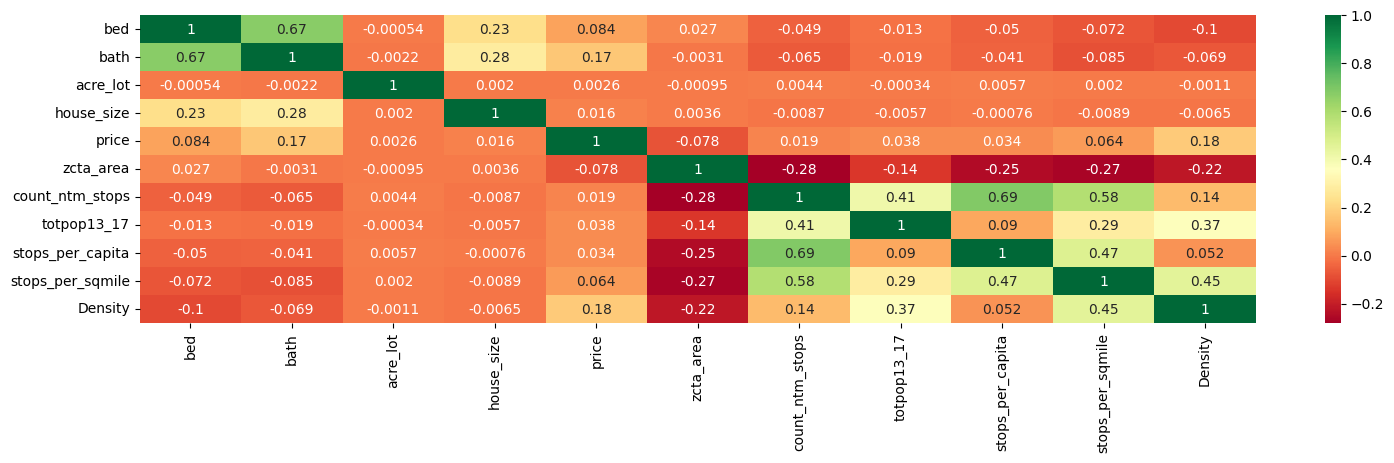

In [129]:
ddf=df1.drop(['status','Zip Code','zcta19'],axis=1)
pylot.figure(figsize=(18, 4))
sb.heatmap(ddf.select_dtypes(include=['float','int']).corr(), annot=True,cmap='RdYlGn')

### 4. Reporting Dataset Information, Handling Missing Values, and Feature Selection
In this analysis, we start by examining the dataset's characteristics, including its shape and identifying any missing values. Subsequently, we will streamline the dataset by removing unnecessary features and specify the target value for our analysis

In [158]:
print('Before removing missing values and possibly duplicated entries, the data shape is', df1.shape)
print('Number of missing values for each feature:\n', df1.isnull().sum())
df1 = df1.dropna()
print('After removing missing values, the data shape is', df1.shape)
data = df1.drop(['status', 'Zip Code'], axis=1)
data = data.rename(columns={'date': 'Date'})
drops = ['price']
target = ['price']
print('Number of unique categories for each column:\n', data.nunique())
data.info()

Before removing missing values and possibly duplicated entries, the data shape is (197638, 25)
Number of missing values for each feature:
 status              0
bed                 0
bath                0
acre_lot            0
city                0
state               0
zip_code            0
house_size          0
date                0
price               0
zcta19              0
zcta_area           0
count_ntm_stops     0
totpop13_17         0
stops_per_capita    0
stops_per_sqmile    0
Zip Code            0
Density             0
dw                  0
qt                  0
mt                  0
yr                  0
dy                  0
dm                  0
wy                  0
dtype: int64
After removing missing values, the data shape is (197638, 25)
Number of unique categories for each column:
 bed                    35
bath                   30
acre_lot             3092
city                 6373
state                  26
zip_code             9007
house_size           7959
Date    

### 5.Check data characteristics

#### 5.1 house prices and states
Analyzing house prices across various states reveals significant disparities in average prices, underscoring the pivotal role of state location in determining housing costs within the United States.

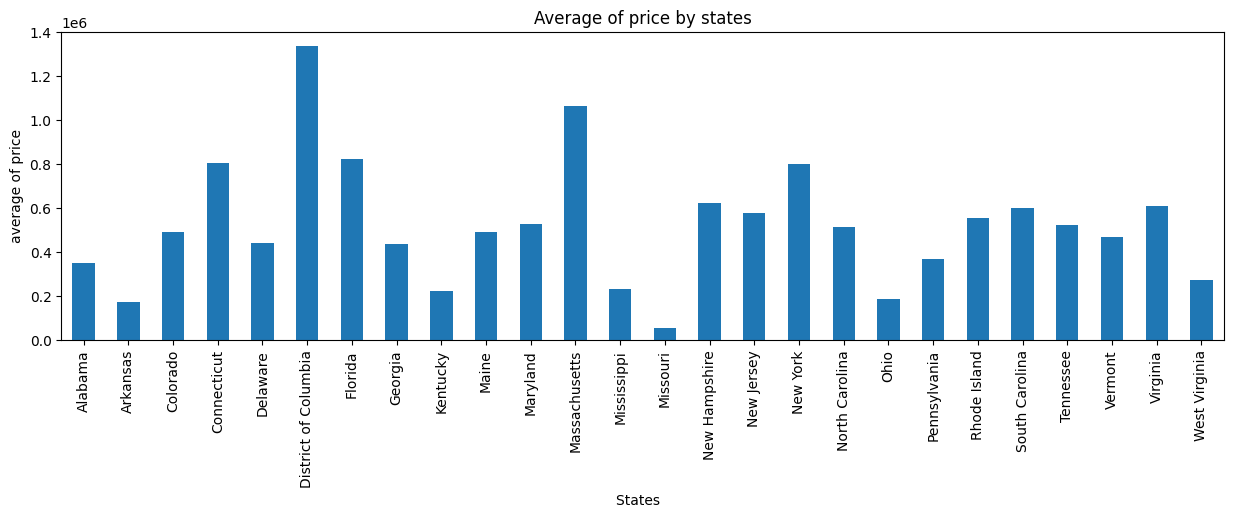

In [131]:
mm = data.groupby('state')['price'].mean()
pylot.figure(figsize=(15, 4))
mm.plot(kind='bar')
pylot.xlabel('States')
pylot.ylabel('average of price')
pylot.title('Average of price by states')
pylot.show()


#### 5.2. House price and House size
Examining the relationship between house price and house area shows that there is a positive relationship between them.

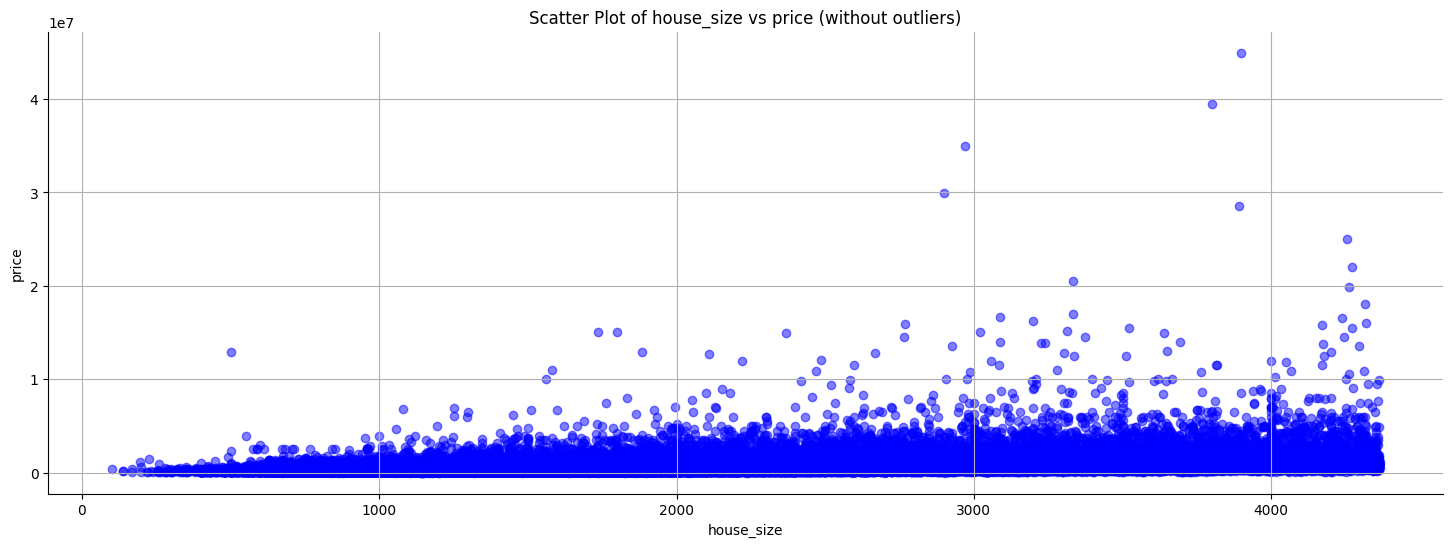

In [139]:
QT1 = data['house_size'].quantile(0.25)
QT3 = data['house_size'].quantile(0.75)
IQTR = QT3 - QT1
lb = QT1 - 1.5 * IQTR
ub = QT3 + 1.5 * IQTR
df_filtered = data[(data['house_size'] >= lb) & (data['house_size'] <= ub)]
pylot.figure(figsize=(18, 6))
pylot.scatter(df_filtered['house_size'], df_filtered['price'], c='blue', alpha=0.5)  # 'c' is color, 'alpha' adjusts transparency
pylot.title('Scatter Plot of house_size vs price (without outliers)')
pylot.xlabel('house_size')
pylot.ylabel('price')
pylot.grid(True)
sb.despine()
pylot.show()

#### 5.3 House price and number of bedrooms
Also, examining the relationship between the price of the house and the number of bedrooms, shows that there is a positive relationship between them.These graphs indicate that our data is facing the problem of **non-constant variance**.

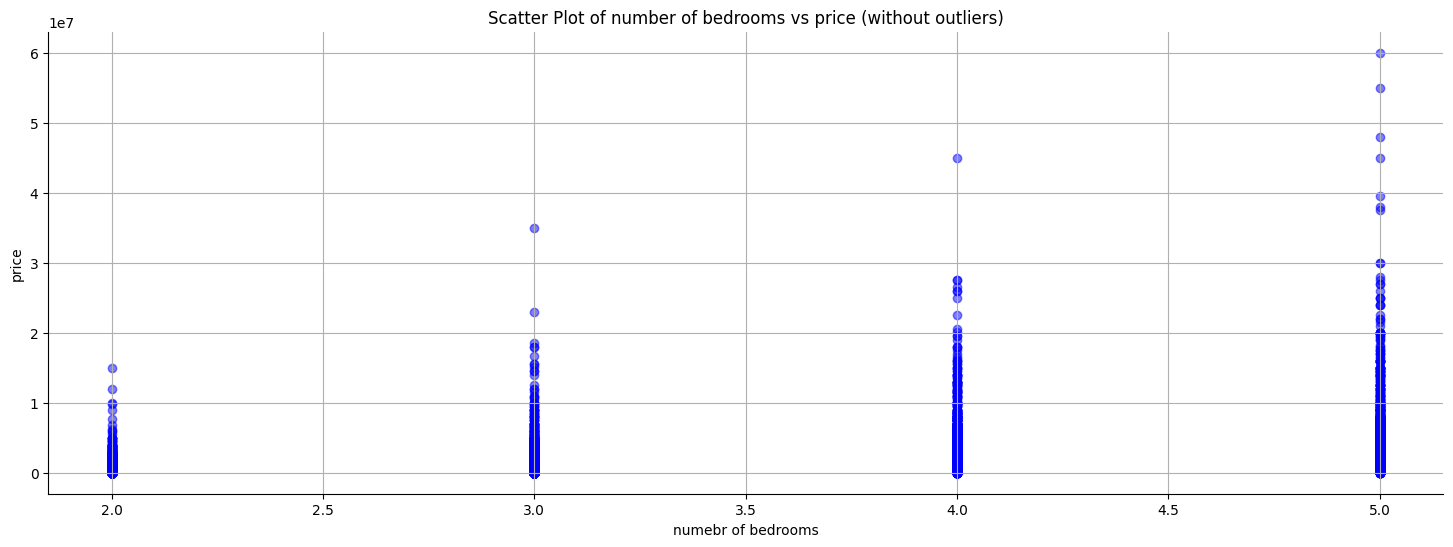

In [138]:
QT1 = data['bed'].quantile(0.25)
QT3 = data['bed'].quantile(0.75)
IQTR = QT3 - QT1
lb = QT1 - 1.5 * IQTR
ub = QT3 + 1.5 * IQTR
df_filtered = data[(data['bed'] >= lb) & (data['bed'] <= ub)]
pylot.figure(figsize=(18, 6))
pylot.scatter(df_filtered['bed'], df_filtered['price'], c='blue', alpha=0.5)  # 'c' is color, 'alpha' adjusts transparency
pylot.title('Scatter Plot of number of bedrooms vs price (without outliers)')
pylot.xlabel('numebr of bedrooms')
pylot.ylabel('price')
pylot.grid(True)
sb.despine()
pylot.show()

#### 5.4. relation between bathrooms and price
Examining the relationship between the house price and the number of bathrooms shows that there is a positive relationship between them.These graphs indicate that our data is facing the problem of **non-constant variance**.

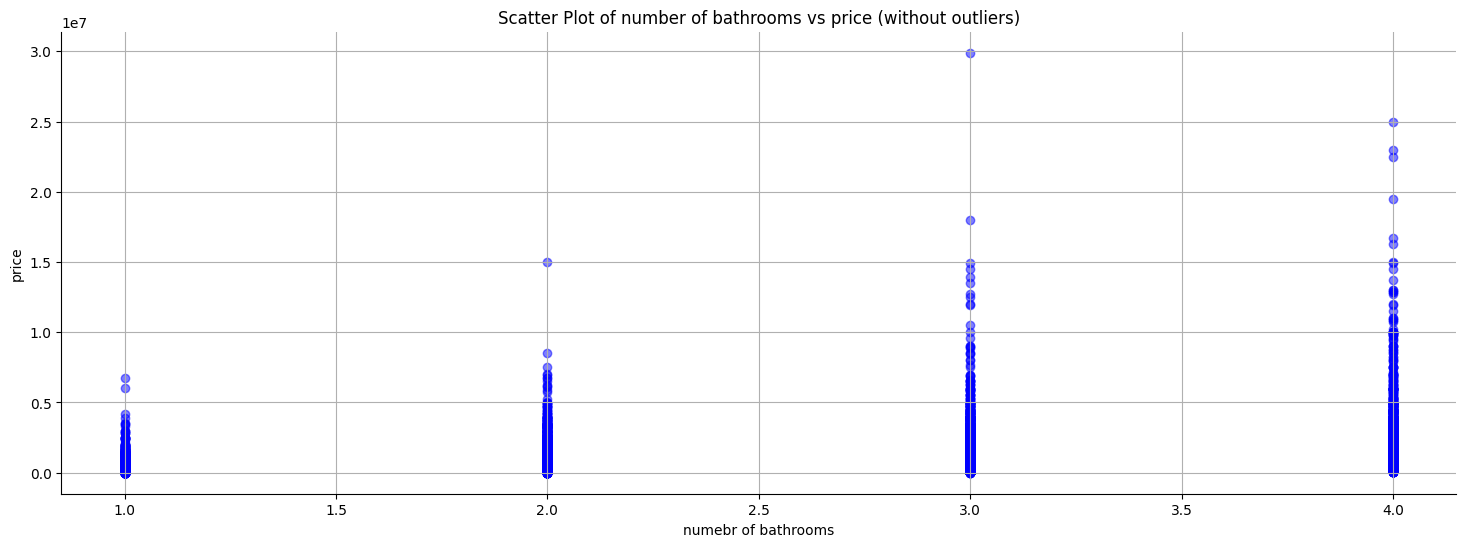

In [136]:
QT1 = data['bath'].quantile(0.25)
QT3 = data['bath'].quantile(0.75)
IQTR = QT3 - QT1
lb = QT1 - 1.5 * IQTR
ub = QT3 + 1.5 * IQTR
dff = data[(data['bath'] >= lb) & (data['bath'] <= ub)]
pylot.figure(figsize=(18, 6))
pylot.scatter(dff['bath'], dff['price'], c='blue', alpha=0.5) 
pylot.title('Scatter Plot of number of bathrooms vs price (without outliers)')
pylot.xlabel('numebr of bathrooms')
pylot.ylabel('price')
pylot.grid(True)
sb.despine()
pylot.show()

### 6.Implementation of Machine Learning 
At this stage, we implement our pipeline, which includes the following items:

1. Import the relevant libraries.
2. Choose several algorithms for the machine learning process, specifically in the regression class.
3. Function to print the specifications of the data used.
4. Function to convert all integer data to float.
5. Function to encode all object variables.
6. Function to convert the date column to the dataframe index.
7. Function to impute missing observations using the mean or mode.
8. Function to split the data into test and train sets.
9. Define the function to calculate the data based on the desired algorithms and calculate $R^2$ and **MSE**
10. Defining a function to compare algorithms based on the output of the previous function and presenting the output in the form of a table\
9. Create a function to compute data using specified algorithms and determine the $R^2$ and MSE,Time.
10. Develop a function to evaluate algorithms by analyzing the results of the preceding function and displaying them in tabular format.

These operations are encapsulated within a Python class, enabling automated calculations.



In [145]:
class FullPipeline:
    def __init__(self):
        self.scaler = preprocessing.StandardScaler(with_mean=False)
        self.models = {
            "Linear_Reg": linear_model.LinearRegression(),
            "Ridge_Reg": linear_model.Ridge(),
            "Lasso_Reg": linear_model.Lasso(),
            "Decision_Tree_Reg": tree.DecisionTreeRegressor(),
            "Random_Forest_Reg": RandomForestRegressor(),
            "Gradient_Boosting_Reg": GradientBoostingRegressor(),
            "KN_Reg": KNeighborsRegressor(),
            "AdaBoost_Reg": AdaBoostRegressor(),
            "XGB_Reg": XGBRegressor()
        }
        pd.set_option('display.float_format', lambda x: '%.6f' % x)

    def Float_Conv(self, df: pd.DataFrame) -> pd.DataFrame:
        intc = df.select_dtypes(include=['int']).columns
        df[intc] = df[intc].astype(float)
        return df

    def std_Conv(self, df: pd.DataFrame) -> pd.DataFrame:
        nc = df.select_dtypes(include=['float']).columns
        self.scaler.fit(df[nc])
        df[nc] = self.scaler.transform(df[nc])
        return df
      
    def EnCd(self, df: pd.DataFrame) -> pd.DataFrame:
        le = {}
        object_cl = df.select_dtypes(include=['object']).columns
        for col in object_cl:
            le[col] = LabelEncoder()
            df[col] = le[col].fit_transform(df[col])
        return df
    def Date_Conv(self, df: pd.DataFrame) -> pd.DataFrame:
        df['Date']=pd.to_datetime(df['Date'])
        df = df.set_index('Date')
        return df

    def Imp_Miss(self, df: pd.DataFrame) -> pd.DataFrame:
            for cl in df.columns:
                if df[cl].dtype == 'object':
                    df[cl] = df[cl].fillna(df[cl].mode()[0])
                elif df[cl].dtype == 'float':
                    df[cl] = df[cl].fillna(df[cl].mean())
            return df

    def Splt_Data(self, df: pd.DataFrame) -> tuple:
        dftrain, dftest = train_test_split(df, test_size=0.2, random_state=42)
        Xtrain = dftrain.drop(drops, axis=1)
        ytrain = dftrain[target].values.ravel()
        Xtest = dftest.drop(target, axis=1)
        ytest = dftest[target].values.ravel()
        return Xtrain, ytrain, Xtest, ytest

    def Model_Ff(self, df: pd.DataFrame, Algor_Name: str) -> float:
        Xtrain, ytrain, Xtest, ytest = self.Splt_Data(df)
        Xtest = Xtest[Xtrain.columns]
        model = self.models[Algor_Name]
        model.fit(Xtrain, ytrain)
        ypred = model.predict(Xtest)
        Rsq = r2_score(ytest, ypred)
        rmse = mean_squared_error(ytest, ypred)
        return Rsq, rmse

    def Model_Comp(self, df: pd.DataFrame) -> pd.DataFrame:
        res = {}
        for Algor_Name, model in self.models.items():
            ST = time.time()  # Record start time
            Rsq, rmse = self.Model_Ff(df, Algor_Name)
            ET = time.time()    # Record end time
            total_time = ET - ST  # Calculate time taken for the iteration
            res[Algor_Name] = {'R2': Rsq, 'RMSE': rmse ** 0.5, 'Time': total_time}
            print(f"{Algor_Name}: {total_time} seconds") 
        return pd.DataFrame(res).T.sort_values(by='R2', ascending=False)

    def Pipe_Run(self, df: pd.DataFrame) -> pd.DataFrame:
        return (
            df.pipe(self.Date_Conv)
            .pipe(self.Float_Conv)
            .pipe(self.Imp_Miss)
            .pipe(self.std_Conv)
            .pipe(self.EnCd)
            .pipe(self.Model_Comp)
        )

# Run and res
pl = FullPipeline()
Rezult = pl.Pipe_Run(data)
Rezult


Linear_Reg: 0.23835444450378418 seconds
Ridge_Reg: 0.13012337684631348 seconds
Lasso_Reg: 0.19808650016784668 seconds
Decision_Tree_Reg: 4.683514833450317 seconds
Random_Forest_Reg: 307.32190918922424 seconds
Gradient_Boosting_Reg: 48.246299266815186 seconds
KN_Reg: 12.765060186386108 seconds
AdaBoost_Reg: 21.606073141098022 seconds
XGB_Reg: 1.0146191120147705 seconds


,R2,RMSE,Time
Random_Forest_Reg,0.665156,0.550449,307.321909
XGB_Reg,0.659411,0.555152,1.014619
Gradient_Boosting_Reg,0.582508,0.614639,48.246299
Decision_Tree_Reg,0.304222,0.793472,4.683515
Ridge_Reg,0.261867,0.817266,0.130123
Linear_Reg,0.261867,0.817266,0.238354
KN_Reg,0.172847,0.865146,12.765060
Lasso_Reg,0.000066,0.951222,0.198087
AdaBoost_Reg,-13.442997,3.615138,21.606073


### 7. selecting the best algorithm
As depicted in the provided output, among the array of algorithms examined, two stand out for their combination of high **$R^2$** values and relatively low RMSE scores. However, it's worth noting that while the RandomForestRegressor algorithm demonstrates strong performance metrics, it requires a substantial amount of time to execute computations. In scenarios where rapid prediction generation is paramount, particularly with expansive datasets, opting for the XGBRegressor algorithm proves to be the most efficient choice.
| Algorithm               |    R2   |   RMSE  |   Time    |
|-------------------------|---------|---------|-----------|
| Random_Forest_Reg       | **0.665**   | 0.550   | **307.322**   |
| XGB_Reg                 | **0.659**   | 0.555   |   **1.015**   |
| Gradient_Boosting_Reg   | 0.583   | 0.615   |  48.246   |
| Decision_Tree_Reg       | 0.304   | 0.793   |   4.684   |
| Ridge_Reg               | 0.262   | 0.817   |   0.130   |
| Linear_Reg              | 0.262   | 0.817   |   0.238   |
| KN_Reg                  | 0.173   | 0.865   |  12.765   |
| Lasso_Reg               | 0.000   | 0.951   |   0.198   |
| AdaBoost_Reg            | -13.443 | 3.615   |  21.606   |




### 8. Hyperparameter tuning:
Now that we've determined the algorithm that provided the optimal results, our selection was made considering criteria such as **$R^2$**, **RMSE**, and computational **time**. Accordingly, the **XGBRegressor** algorithm emerged as the preferred choice.
Initially, it's essential to bear in mind that this algorithm encompasses numerous hyperparameters, and for the present analysis, I have solely selected the parameter 'n-estimator','max_depth','min_child_weight'.
```
param_grids = {'XGBRegressor':
               {'n_estimators': [100,200,400],
                'max_depth':[2,3,5],
                'min_child_weight':[6,7,8],
                'random_state': [42]                
                               }}
```
As previously mentioned, we've encountered the issue of **non-constant variance**. To address this, I've utilized the **PowerTransformer** from the **sklearn.preprocessing.PowerTransformer** module. This transformation is applied feature-wise to make the data distribution more Gaussian-like.

The table below presents the outcomes of the analysis. As observed, the results indicate a significant improvement in 
**$R^2$**
  score, from 66% to 85%, following the optimization of hyperparameters.

| Model Name   | Max Depth | Min Child Weight | N Estimators | R2       | RMSE     | Random State | Time      |
|--------------|-----------|------------------|--------------|----------|----------|--------------|-----------|
| XGBRegressor | 5         | 8              | 400 | **0.85**   | 0.4 | 42       | 149|




In [149]:
param_grids = {'XGBRegressor':
               {'n_estimators': [100,200,400],
                'max_depth':[2,3,5],
                'min_child_weight':[6,7,8],
                'random_state': [42]                
                               }}


class FullPipeline:
    def __init__(self):
        self.scaler = preprocessing.StandardScaler(with_mean=False)
        self.power = PowerTransformer()
        self.models = {"XGBRegressor": XGBRegressor() }
        pd.set_option('display.float_format', lambda x: '%.6f' % x)

    def Float_Conv(self, df: pd.DataFrame) -> pd.DataFrame:
        intc = df.select_dtypes(include=['int']).columns
        df[intc] = df[intc].astype(float)
        return df

    def std_Conv(self, df: pd.DataFrame) -> pd.DataFrame:
        nc = data.select_dtypes(include=['float']).columns
        self.scaler.fit(df[nc])
        self.power.fit(df[nc])
        df[nc] = self.scaler.transform(df[nc])
        df[nc] = self.power.transform(df[nc])
        return df
      
    def EnCd(self, df: pd.DataFrame) -> pd.DataFrame:
        le = {}
        object_cl = df.select_dtypes(include=['object']).columns
        for col in object_cl:
            le[col] = LabelEncoder()
            df[col] = le[col].fit_transform(df[col])
        return df
    def Date_Conv(self, df: pd.DataFrame) -> pd.DataFrame:
        df['Date']=pd.to_datetime(df['Date'])
        df = df.set_index('Date')
        return df

    def Imp_Miss(self, df: pd.DataFrame) -> pd.DataFrame:
            for cl in df.columns:
                if df[cl].dtype == 'object':
                    df[cl] = df[cl].fillna(df[cl].mode()[0])
                elif df[cl].dtype == 'float':
                    df[cl] = df[cl].fillna(df[cl].mean())
            return df

    def Splt_Data(self, df: pd.DataFrame) -> tuple:
        dftrain, dftest = train_test_split(df, test_size=0.2, random_state=42)
        Xtrain = dftrain.drop(drops, axis=1)
        ytrain = dftrain[target].values.ravel()
        Xtest = dftest.drop(target, axis=1)
        ytest = dftest[target].values.ravel()
        return Xtrain, ytrain, Xtest, ytest

    def Model_Ff(self, df: pd.DataFrame, Algor_Name: str) -> float:
        Xtrain, ytrain, Xtest, ytest = self.Splt_Data(df)
        Xtest = Xtest[Xtrain.columns]
        model = self.models[Algor_Name]
        model.fit(Xtrain, ytrain)
        ypred = model.predict(Xtest)
        Rsq = r2_score(ytest, ypred)
        mse = mean_squared_error(ytest, ypred)
        return Rsq, mse
    def Model_Comp(self, df: pd.DataFrame) -> pd.DataFrame:
        res = {}
        Xtrain, ytrain, Xtest, ytest = self.Splt_Data(df)
        for Algor_Name, model in self.models.items():
            st = time.time() 
            param_grid = param_grids.get(Algor_Name, {})
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
            grid_search.fit(Xtrain, ytrain)
            best_model = grid_search.best_estimator_
            ypred = best_model.predict(Xtest)
            Rsq = r2_score(ytest, ypred)
            mse = mean_squared_error(ytest, ypred)
            
            et = time.time()
            tt = et - st  
            best_params = grid_search.best_params_
            max_depth = best_params['max_depth']
            min_child_weight = best_params['min_child_weight']
            n_estimators = best_params['n_estimators']
            random_state = best_params['random_state']
            res[Algor_Name] = {'Model Name': 'XGBRegressor',
                                   'Max Depth': max_depth,
                                   'Min Child Weight': min_child_weight,
                                   'N Estimators': n_estimators,
                                   'Random State': random_state,
                                   'R2': Rsq,
                                   'RMSE': mse ** 0.5,
                                   'Time': tt}
            
            print(f"{Algor_Name}: {tt} seconds")  # Print time taken for the iteration
        
        return pd.DataFrame(res).T
    
    def Pipe_Run(self, df: pd.DataFrame) -> pd.DataFrame:
        return (
            df.pipe(self.Date_Conv)
            .pipe(self.Float_Conv)
            .pipe(self.Imp_Miss)
            .pipe(self.std_Conv)
            .pipe(self.EnCd)
            .pipe(self.Model_Comp)
        )

# Run and res
pl = FullPipeline()
Rezult = pl.Pipe_Run(data)
Rezult


XGBRegressor: 149.50338101387024 seconds


,Max Depth,Min Child Weight,Model Name,N Estimators,R2,RMSE,Random State,Time
XGBRegressor,5,8,XGBRegressor,400,0.849380,0.250694,42,149.503381


## Conclusion
Based on the results we've obtained, I present **XGBRegressor** as the ultimate choice for accurately estimating and predicting the actual prices of houses across various states with minimal error. Because **XGBRegressor** stands out for its combination of low error rates and high **$R^2$** values. Additionally, it offers quick and meaningful estimations of house prices, making it a favorable choice.

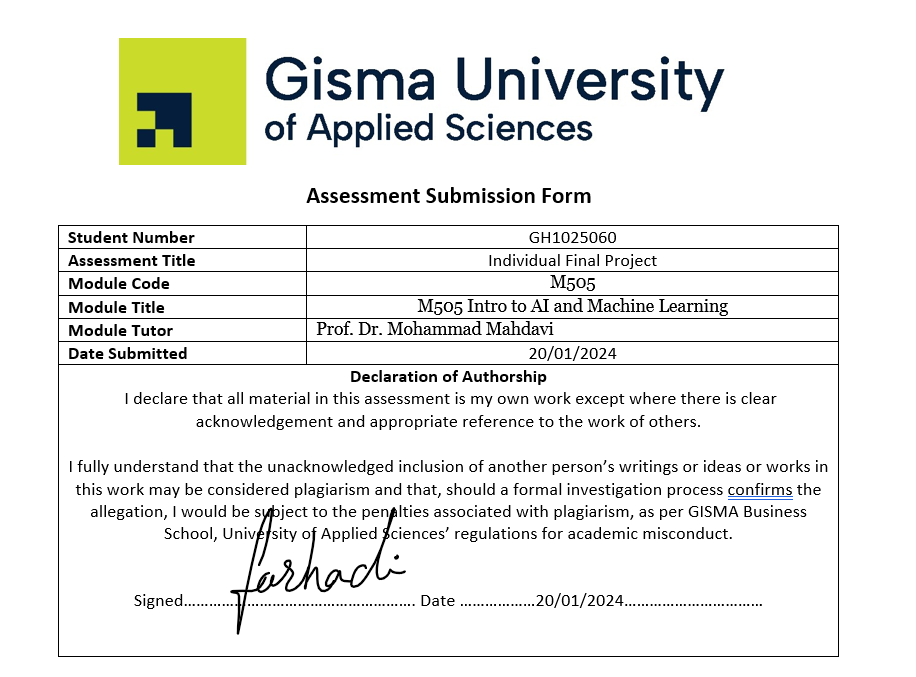